In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
from sklearn.model_selection import train_test_split
import seaborn as sns


In [115]:

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
total_data = pd.read_csv(url)

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [116]:
# Select only the required columns
housing_data = total_data[['Latitude', 'Longitude', 'MedInc']]

# Display the first few rows to confirm
print(housing_data.head())

   Latitude  Longitude  MedInc
0     37.88    -122.23  8.3252
1     37.86    -122.22  8.3014
2     37.85    -122.24  7.2574
3     37.85    -122.25  5.6431
4     37.85    -122.25  3.8462


In [117]:
# Split the data into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(housing_data, test_size=0.2, random_state=42)
train_data.head()

# Display the shapes of the train and test sets
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

Training set shape: (16512, 3)
Test set shape: (4128, 3)


In [118]:
# Normalize the dataset (only the Latitude, Longitude, and MedInc columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(housing_data[['Latitude', 'Longitude', 'MedInc']])

In [119]:
# Initialize the KMeans model with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model to the scaled data
kmeans.fit(scaled_data)

# Predict the cluster for each data point
clusters = kmeans.predict(scaled_data)

In [120]:
# Add the clusters as a new column in the dataset
housing_data['cluster'] = clusters

# Display the first few rows to verify
print(housing_data.head())

   Latitude  Longitude  MedInc  cluster
0     37.88    -122.23  8.3252        1
1     37.86    -122.22  8.3014        1
2     37.85    -122.24  7.2574        1
3     37.85    -122.25  5.6431        1
4     37.85    -122.25  3.8462        4


/tmp/ipykernel_3115/3699620118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data['cluster'] = clusters


In [121]:
# Check if the 'cluster' column exists in the DataFrame
print(total_data.columns)

# If it exists, proceed with the plot
if 'cluster' in total_data.columns:
    sns.scatterplot(x='Longitude', y='Latitude', hue='cluster', data=total_data, palette="viridis")
    plt.title("K-Means Clustering of California Housing Data")
    plt.show()
else:
    print("Column 'cluster' not found in the DataFrame.")

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
Column 'cluster' not found in the DataFrame.


In [122]:
model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_unsup.fit(train_data)

KMeans(n_clusters=6, random_state=42)

In [123]:
y_train = list(model_unsup.labels_)
train_data["cluster"] = y_train
train_data.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


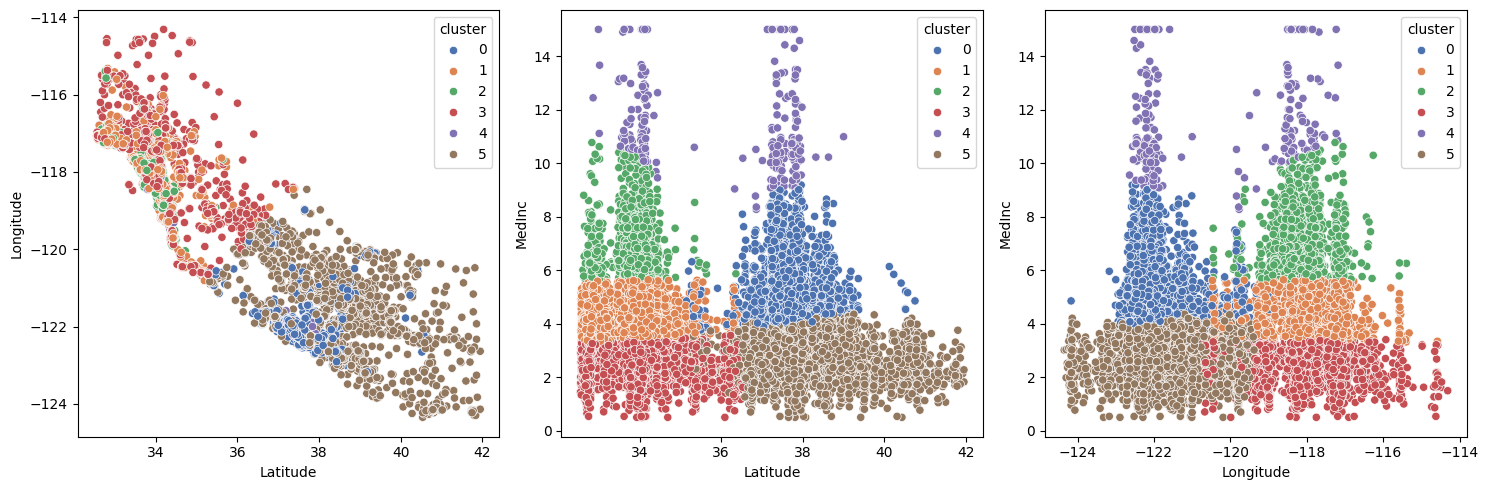

In [124]:
# Plot the clusters with Longitude and Latitude
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = train_data, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = train_data, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = train_data, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [125]:
# Normalize the test data using the same scaler fitted on the training data
scaled_test_data = scaler.transform(test_data[['Latitude', 'Longitude', 'MedInc']])

In [126]:
# Predict the cluster for the test data
test_clusters = kmeans.predict(scaled_test_data)

# Add the clusters as a new column in the test dataset
test_data['cluster'] = test_clusters

# Display the first few rows of the test set with clusters
print(test_data.head())

       Latitude  Longitude  MedInc  cluster
20046     36.06    -119.01  1.6812        2
3024      35.14    -119.46  2.5313        2
15663     37.80    -122.44  3.4801        4
20484     34.28    -118.72  5.7376        0
9814      36.62    -121.93  3.7250        4


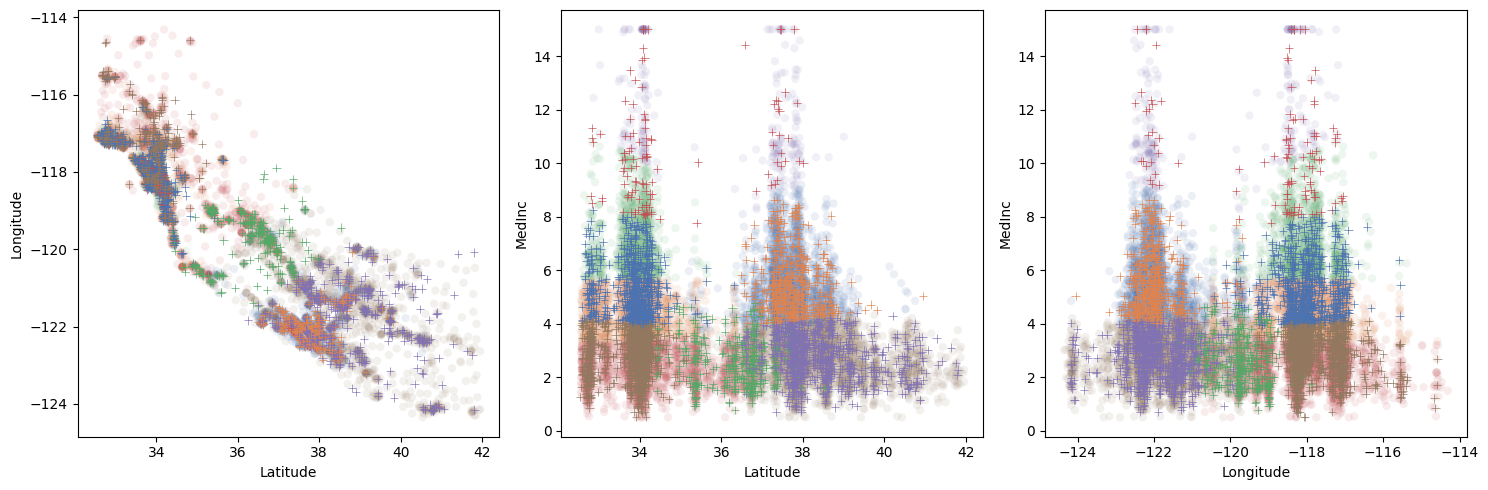

In [127]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = train_data, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = train_data, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = train_data, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = test_data, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = test_data, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = test_data, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [128]:
# Normalize the dataset (only the Latitude, Longitude, and MedInc columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(housing_data[['Latitude', 'Longitude', 'MedInc']])

In [129]:
# Initialize the KMeans model with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model to the scaled data
kmeans.fit(scaled_data)

# Predict the cluster for each data point
clusters = kmeans.predict(scaled_data)

In [130]:
from sklearn.tree import DecisionTreeClassifier

model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(train_data, y_train)

DecisionTreeClassifier(random_state=42)

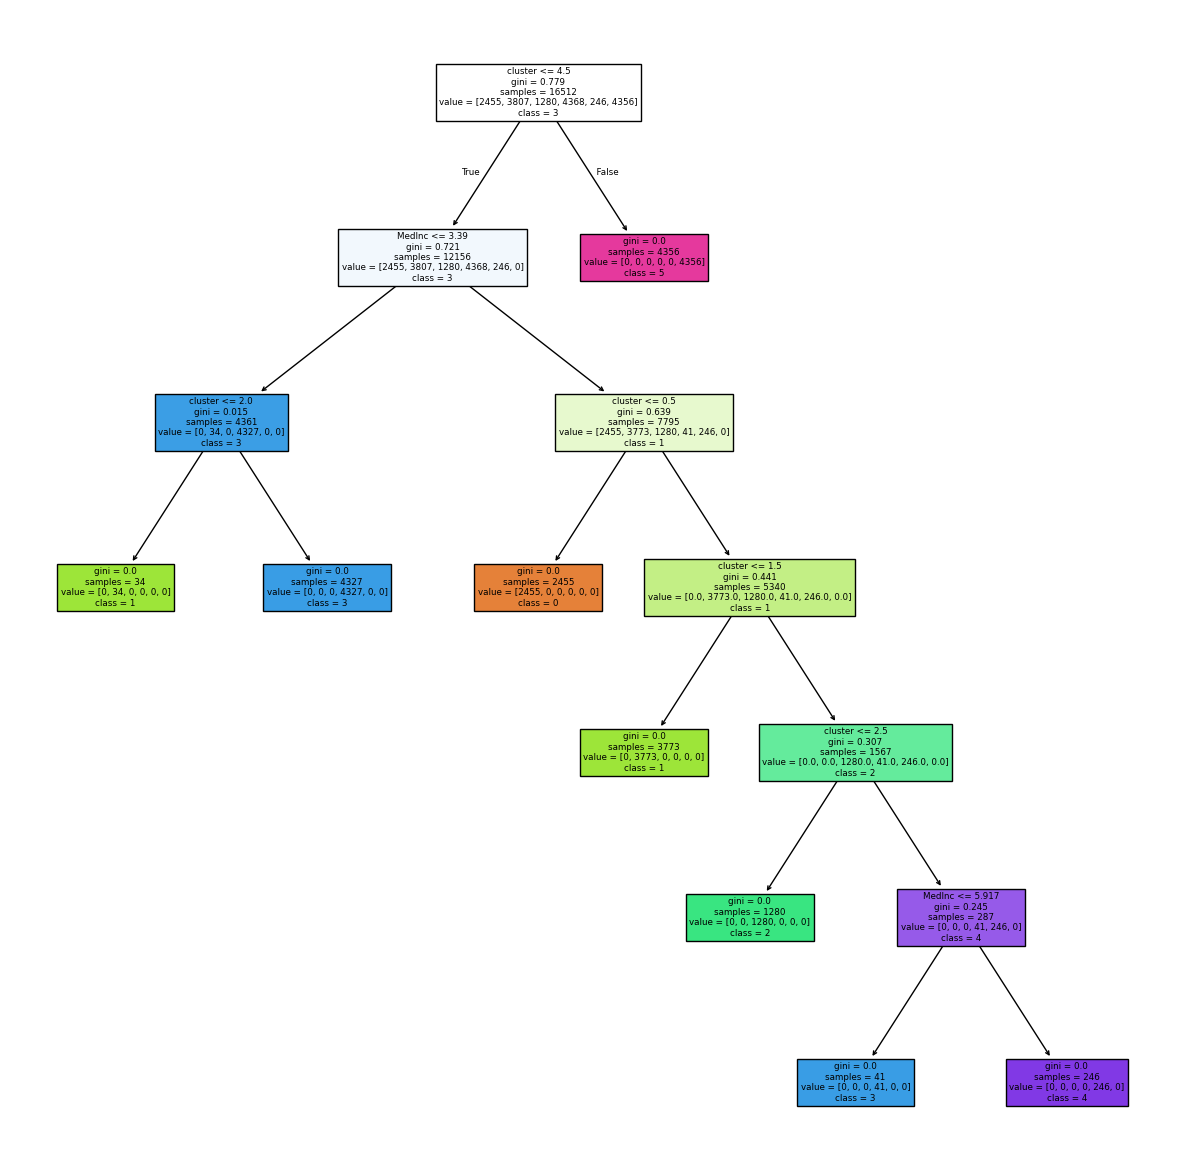

In [131]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(train_data.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [132]:
# Define features (X) and labels (y) for training
X_train = housing_data[['Latitude', 'Longitude', 'MedInc']]
y_train = housing_data['cluster']

# Features for test set
X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']


In [133]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [134]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [135]:
# Print detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       524
           2       1.00      1.00      1.00       337
           3       1.00      1.00      1.00       114
           4       1.00      1.00      1.00       950
           5       1.00      1.00      1.00      1366

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128



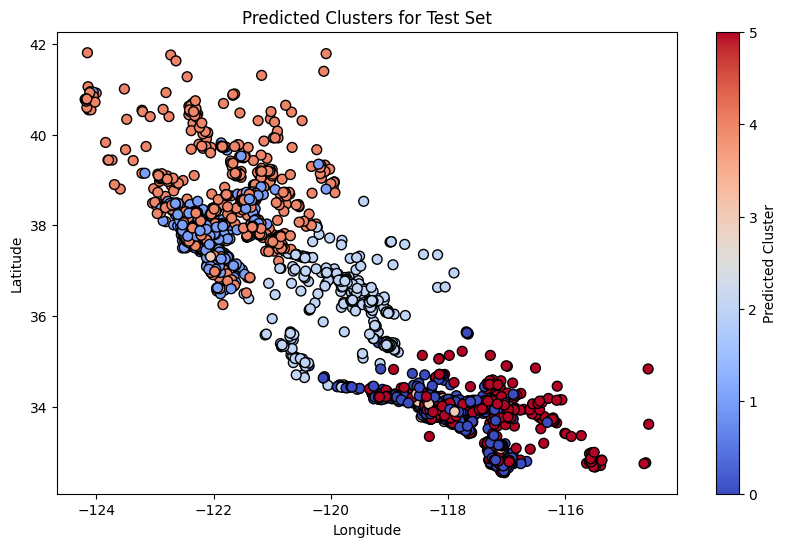

In [136]:
# Plot the predicted clusters on the test data
plt.figure(figsize=(10, 6))

# Scatter plot for predicted test data clusters
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=y_pred, cmap='coolwarm', s=50, edgecolors='k', label='Test Predictions')

plt.colorbar(label='Predicted Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Clusters for Test Set')
plt.show()

In [137]:
import os
import joblib

# Create the directory if it doesn't exist
os.makedirs('./models', exist_ok=True)

# Save the K-Means model to a file
joblib.dump(kmeans, './models/kmeans_model.pkl')
print("K-Means model saved successfully!")

K-Means model saved successfully!


In [138]:
# Save the Random Forest model to a file
joblib.dump(rf_classifier, './models/random_forest_model.pkl')
print("Random Forest model saved successfully!")

Random Forest model saved successfully!


In [139]:
# Load the K-Means model
kmeans_loaded = joblib.load('./models/kmeans_model.pkl')

# Load the Random Forest model
rf_loaded = joblib.load('./models/random_forest_model.pkl')